In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('slowloris.csv')

In [3]:
df.head()

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
0,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000
1,1,54,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,...,0,0,0,1,0,1,0,0,0,0.000076
2,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000
3,1,54,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,...,0,0,0,1,0,1,0,0,0,0.000043
4,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18817 entries, 0 to 18816
Data columns (total 29 columns):
frame.encap_type    18817 non-null int64
frame.len           18817 non-null int64
frame.protocols     18817 non-null object
ip.hdr_len          18817 non-null int64
ip.len              18817 non-null int64
ip.flags.rb         18817 non-null int64
ip.flags.df         18817 non-null int64
p.flags.mf          18817 non-null int64
ip.frag_offset      18817 non-null int64
ip.ttl              18817 non-null int64
ip.proto            18817 non-null int64
ip.src              18817 non-null object
ip.dst              18817 non-null object
tcp.srcport         18817 non-null int64
tcp.dstport         18817 non-null int64
tcp.len             18817 non-null int64
tcp.ack             18817 non-null int64
tcp.flags.res       18817 non-null int64
tcp.flags.ns        18817 non-null int64
tcp.flags.cwr       18817 non-null int64
tcp.flags.ecn       18817 non-null int64
tcp.flags.urg       18817 n

In [5]:
df.drop(columns=['frame.protocols','ip.src','ip.dst'],inplace=True)

In [6]:
df.insert(column='Label',loc=26,value=1)

In [7]:
df.head()

,frame.encap_type,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,...,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,Label
0,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,1,0,64240,0.000000,1
1,1,54,20,40,0,1,0,0,64,6,...,0,0,1,0,1,0,0,0,0.000076,1
2,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,1,0,64240,0.000000,1
3,1,54,20,40,0,1,0,0,64,6,...,0,0,1,0,1,0,0,0,0.000043,1
4,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,1,0,64240,0.000000,1


In [8]:
df1 = pd.read_csv('dataset_normal.csv',nrows=df.shape[0])

In [9]:
df1.head()

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,Label
0,1,206,eth:ethertype:ip:tcp:ssh,20,192,0,1,0,0,128,...,0,0,1,1,0,0,0,16697,0.000000,normal
1,1,60,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,...,0,0,1,0,0,0,0,7504,0.000537,normal
2,1,60,eth:ethertype:ip:tcp,20,40,0,1,0,0,63,...,0,0,1,0,0,0,0,7504,0.000155,normal
3,1,774,eth:ethertype:ip:tcp:ssh,20,760,0,1,0,0,64,...,0,0,1,1,0,0,0,7504,0.004483,normal
4,1,774,eth:ethertype:ip:tcp,20,760,0,1,0,0,63,...,0,0,1,1,0,0,0,7504,0.001321,normal


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18817 entries, 0 to 18816
Data columns (total 30 columns):
frame.encap_type    18817 non-null int64
frame.len           18817 non-null int64
frame.protocols     18817 non-null object
ip.hdr_len          18817 non-null int64
ip.len              18817 non-null int64
ip.flags.rb         18817 non-null int64
ip.flags.df         18817 non-null int64
p.flags.mf          18817 non-null int64
ip.frag_offset      18817 non-null int64
ip.ttl              18817 non-null int64
ip.proto            18817 non-null int64
ip.src              18817 non-null object
ip.dst              18817 non-null object
tcp.srcport         18817 non-null int64
tcp.dstport         18817 non-null int64
tcp.len             18817 non-null int64
tcp.ack             18817 non-null int64
tcp.flags.res       18817 non-null int64
tcp.flags.ns        18817 non-null int64
tcp.flags.cwr       18817 non-null int64
tcp.flags.ecn       18817 non-null int64
tcp.flags.urg       18817 n

In [11]:
df1.drop(columns=['frame.protocols','ip.src','ip.dst'],inplace=True)

In [12]:
df1.Label=0

In [13]:
df1.head()

,frame.encap_type,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,...,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,Label
0,1,206,20,192,0,1,0,0,128,6,...,0,0,1,1,0,0,0,16697,0.000000,0
1,1,60,20,40,0,1,0,0,64,6,...,0,0,1,0,0,0,0,7504,0.000537,0
2,1,60,20,40,0,1,0,0,63,6,...,0,0,1,0,0,0,0,7504,0.000155,0
3,1,774,20,760,0,1,0,0,64,6,...,0,0,1,1,0,0,0,7504,0.004483,0
4,1,774,20,760,0,1,0,0,63,6,...,0,0,1,1,0,0,0,7504,0.001321,0


In [14]:
df2 = pd.read_csv('httpflood.csv')

In [15]:
df2.head()

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
0,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,28400,0.000000
1,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,55,...,0,0,0,1,0,0,1,0,28960,0.006674
2,1,66,eth:ethertype:ip:tcp,20,52,0,1,0,0,64,...,0,0,0,1,0,0,0,0,28416,0.000068
3,1,305,eth:ethertype:ip:tcp,20,291,0,1,0,0,64,...,0,0,0,1,1,0,0,0,28416,0.015462
4,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,28400,0.000000


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10431 entries, 0 to 10430
Data columns (total 29 columns):
frame.encap_type    10431 non-null int64
frame.len           10431 non-null int64
frame.protocols     10431 non-null object
ip.hdr_len          10431 non-null int64
ip.len              10431 non-null int64
ip.flags.rb         10431 non-null int64
ip.flags.df         10431 non-null int64
p.flags.mf          10431 non-null int64
ip.frag_offset      10431 non-null int64
ip.ttl              10431 non-null int64
ip.proto            10431 non-null int64
ip.src              10431 non-null object
ip.dst              10431 non-null object
tcp.srcport         10431 non-null int64
tcp.dstport         10431 non-null int64
tcp.len             10431 non-null int64
tcp.ack             10431 non-null int64
tcp.flags.res       10431 non-null int64
tcp.flags.ns        10431 non-null int64
tcp.flags.cwr       10431 non-null int64
tcp.flags.ecn       10431 non-null int64
tcp.flags.urg       10431 n

In [17]:
df2.drop(columns=['frame.protocols','ip.src','ip.dst'],inplace=True)

In [18]:
df2.insert(column='Label',loc=26,value=1)

In [19]:
df2.head()

,frame.encap_type,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,...,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,Label
0,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,1,0,28400,0.000000,1
1,1,74,20,60,0,1,0,0,55,6,...,0,0,1,0,0,1,0,28960,0.006674,1
2,1,66,20,52,0,1,0,0,64,6,...,0,0,1,0,0,0,0,28416,0.000068,1
3,1,305,20,291,0,1,0,0,64,6,...,0,0,1,1,0,0,0,28416,0.015462,1
4,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,1,0,28400,0.000000,1


In [20]:
df_merged = pd.concat([df,df1,df2])
y = df_merged.Label

In [21]:
df_merged.shape

(48065, 27)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(df_merged,y,test_size=0.3,random_state=42)

In [23]:
x_train.drop(columns='Label',inplace=True)
x_test.drop(columns='Label',inplace=True)

/home/hari/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
model1 = DecisionTreeClassifier(random_state=42)

In [25]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [26]:
pred = model1.predict(x_test)

In [27]:
print(accuracy_score(y_pred=pred,y_true=y_test))
print(precision_score(y_pred=pred,y_true=y_test))
print(recall_score(y_pred=pred,y_true=y_test))
print(f1_score(y_pred=pred,y_true=y_test))

0.9995839112343967
0.9994325275224152
0.9998864539570796
0.9996594392098991


***

In [28]:
model2 = SVC(random_state=42)

In [29]:
model2.fit(x_train,y_train)

/home/hari/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
pred = model2.predict(x_test)

In [31]:
print(accuracy_score(y_pred=pred,y_true=y_test))
print(precision_score(y_pred=pred,y_true=y_test))
print(recall_score(y_pred=pred,y_true=y_test))
print(f1_score(y_pred=pred,y_true=y_test))

0.9063800277392511
0.8670867382101014
1.0
0.9288124868171271


***

In [32]:
df4 = pd.read_csv('captured.csv')

In [33]:
df4.head()

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
0,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000
1,1,54,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,...,0,0,0,1,0,1,0,0,0,0.000076
2,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000
3,1,54,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,...,0,0,0,1,0,1,0,0,0,0.000043
4,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000


In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10717 entries, 0 to 10716
Data columns (total 29 columns):
frame.encap_type    10717 non-null int64
frame.len           10717 non-null int64
frame.protocols     10717 non-null object
ip.hdr_len          10717 non-null int64
ip.len              10717 non-null int64
ip.flags.rb         10717 non-null int64
ip.flags.df         10717 non-null int64
p.flags.mf          10717 non-null int64
ip.frag_offset      10717 non-null int64
ip.ttl              10717 non-null int64
ip.proto            10717 non-null int64
ip.src              10717 non-null object
ip.dst              10717 non-null object
tcp.srcport         10717 non-null int64
tcp.dstport         10717 non-null int64
tcp.len             10717 non-null int64
tcp.ack             10717 non-null int64
tcp.flags.res       10717 non-null int64
tcp.flags.ns        10717 non-null int64
tcp.flags.cwr       10717 non-null int64
tcp.flags.ecn       10717 non-null int64
tcp.flags.urg       10717 n

In [35]:
df4.drop(columns=['frame.protocols','ip.src','ip.dst'],inplace=True)

In [36]:
df4.head()

,frame.encap_type,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
0,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,0,1,0,64240,0.000000
1,1,54,20,40,0,1,0,0,64,6,...,0,0,0,1,0,1,0,0,0,0.000076
2,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,0,1,0,64240,0.000000
3,1,54,20,40,0,1,0,0,64,6,...,0,0,0,1,0,1,0,0,0,0.000043
4,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,0,1,0,64240,0.000000


In [37]:
predictions = model2.predict(df4)

In [38]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
for i in predictions:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


***

In [40]:
df5 = pd.read_csv('pcapanalysis.csv')

In [41]:
df5.head()

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
0,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000
1,1,54,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,...,0,0,0,1,0,1,0,0,0,0.000076
2,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000
3,1,54,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,...,0,0,0,1,0,1,0,0,0,0.000043
4,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000


In [42]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817 entries, 0 to 10816
Data columns (total 29 columns):
frame.encap_type    10817 non-null int64
frame.len           10817 non-null int64
frame.protocols     10817 non-null object
ip.hdr_len          10817 non-null int64
ip.len              10817 non-null int64
ip.flags.rb         10817 non-null int64
ip.flags.df         10817 non-null int64
p.flags.mf          10817 non-null int64
ip.frag_offset      10817 non-null int64
ip.ttl              10817 non-null int64
ip.proto            10817 non-null int64
ip.src              10817 non-null object
ip.dst              10817 non-null object
tcp.srcport         10817 non-null int64
tcp.dstport         10817 non-null int64
tcp.len             10817 non-null int64
tcp.ack             10817 non-null int64
tcp.flags.res       10817 non-null int64
tcp.flags.ns        10817 non-null int64
tcp.flags.cwr       10817 non-null int64
tcp.flags.ecn       10817 non-null int64
tcp.flags.urg       10817 n

In [43]:
df5.drop(columns=['frame.protocols','ip.src','ip.dst'],inplace=True)

In [44]:
df5.head()

,frame.encap_type,frame.len,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
0,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,0,1,0,64240,0.000000
1,1,54,20,40,0,1,0,0,64,6,...,0,0,0,1,0,1,0,0,0,0.000076
2,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,0,1,0,64240,0.000000
3,1,54,20,40,0,1,0,0,64,6,...,0,0,0,1,0,1,0,0,0,0.000043
4,1,74,20,60,0,1,0,0,64,6,...,0,0,0,0,0,0,1,0,64240,0.000000


In [45]:
predictions1 = model2.predict(df5)

In [46]:
predictions1

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
for i in predictions1:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


***

In [48]:
df = pd.read_csv('slowloris.csv')
df1 = pd.read_csv('dataset_normal.csv',nrows=df.shape[0])

In [49]:
df6 = pd.read_csv('dataset_normal.csv',skiprows=df.shape[0],nrows=1000,names=df1.columns)

In [50]:
df6.head()

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,Label
0,1,1514,eth:ethertype:ip:tcp:ssh,20,1500,0,1,0,0,64,...,0,0,1,0,0,0,0,7504,0.000292,normal
1,1,1514,eth:ethertype:ip:tcp,20,1500,0,1,0,0,63,...,0,0,1,0,0,0,0,7504,0.000923,normal
2,1,1514,eth:ethertype:ip:tcp:ssh,20,1500,0,1,0,0,64,...,0,0,1,0,0,0,0,7504,0.000375,normal
3,1,1434,eth:ethertype:ip:tcp,20,1420,0,1,0,0,241,...,0,0,1,0,0,0,0,5274,0.004846,normal
4,1,60,eth:ethertype:ip:tcp,20,40,0,1,0,0,128,...,0,0,1,0,0,0,0,64240,0.000829,normal


In [51]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
frame.encap_type    1000 non-null int64
frame.len           1000 non-null int64
frame.protocols     1000 non-null object
ip.hdr_len          1000 non-null int64
ip.len              1000 non-null int64
ip.flags.rb         1000 non-null int64
ip.flags.df         1000 non-null int64
p.flags.mf          1000 non-null int64
ip.frag_offset      1000 non-null int64
ip.ttl              1000 non-null int64
ip.proto            1000 non-null int64
ip.src              1000 non-null object
ip.dst              1000 non-null object
tcp.srcport         1000 non-null int64
tcp.dstport         1000 non-null int64
tcp.len             1000 non-null int64
tcp.ack             1000 non-null int64
tcp.flags.res       1000 non-null int64
tcp.flags.ns        1000 non-null int64
tcp.flags.cwr       1000 non-null int64
tcp.flags.ecn       1000 non-null int64
tcp.flags.urg       1000 non-null int64
tcp.flags.a

In [52]:
df6.drop(columns=['frame.protocols','ip.src','ip.dst','Label'],inplace=True)

In [53]:
predictions2 = model2.predict(df6)

In [54]:
pred0 = []
pred1 = []
for i in predictions2:
    if i==1:
        pred1.append(i)
    else:
        pred0.append(i)

In [55]:
len(pred0)

243

In [56]:
len(pred1)

757

***

In [57]:
df7 = pd.read_csv('capture2.csv')

In [58]:
df7.head()

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
0,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000
1,1,54,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,...,0,0,0,1,0,1,0,0,0,0.000090
2,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000
3,1,54,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,...,0,0,0,1,0,1,0,0,0,0.000052
4,1,74,eth:ethertype:ip:tcp,20,60,0,1,0,0,64,...,0,0,0,0,0,0,1,0,64240,0.000000


In [59]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127427 entries, 0 to 127426
Data columns (total 29 columns):
frame.encap_type    127427 non-null int64
frame.len           127427 non-null int64
frame.protocols     127427 non-null object
ip.hdr_len          127427 non-null int64
ip.len              127427 non-null int64
ip.flags.rb         127427 non-null int64
ip.flags.df         127427 non-null int64
p.flags.mf          127427 non-null int64
ip.frag_offset      127427 non-null int64
ip.ttl              127427 non-null int64
ip.proto            127427 non-null int64
ip.src              127427 non-null object
ip.dst              127427 non-null object
tcp.srcport         127427 non-null int64
tcp.dstport         127427 non-null int64
tcp.len             127427 non-null int64
tcp.ack             127427 non-null int64
tcp.flags.res       127427 non-null int64
tcp.flags.ns        127427 non-null int64
tcp.flags.cwr       127427 non-null int64
tcp.flags.ecn       127427 non-null int64
tcp.

In [60]:
predictions3 = model2.predict(df7.drop(columns=['frame.protocols','ip.src','ip.dst']))

In [61]:
df7.insert(column='Label',loc=29,value=predictions3)

In [70]:
df7['ip.src'].unique()

array(['172.16.129.131', '172.16.129.1', '172.16.129.132',
       '172.16.129.130', '0', '172.16.129.254'], dtype=object)

In [75]:
df7[df7['ip.src'] == '172.16.129.1']['Label'].value_counts()

1    12262
0        1
Name: Label, dtype: int64

In [76]:
df7['Label'].value_counts()

1    127426
0         1
Name: Label, dtype: int64

In [78]:
df7[df7['Label'] == 0]['ip.src']

84985    172.16.129.1
Name: ip.src, dtype: object

***

In [81]:
df8 = pd.read_csv('capture2.csv')

In [82]:
predictions4 = model1.predict(df8.drop(columns=['frame.protocols','ip.src','ip.dst']))

In [83]:
df8.insert(column='Label',loc=29,value=predictions4)

In [84]:
df8[df8['ip.src'] == '172.16.129.1']['Label'].value_counts()

1    12262
0        1
Name: Label, dtype: int64

In [85]:
df8['Label'].value_counts()

1    127383
0        44
Name: Label, dtype: int64

In [86]:
df8[df8['ip.src'] == '172.16.129.131']['Label'].value_counts()

1    58275
0       32
Name: Label, dtype: int64

In [87]:
df8[df8['ip.src'] == '172.16.129.132']['Label'].value_counts()

1    5023
0       1
Name: Label, dtype: int64

In [95]:
df7['frame.protocols'].value_counts()

eth:ethertype:ip:tcp                         119783
eth:ethertype:ip:tcp:http:data-text-lines      6609
eth:ethertype:ip:tcp:http                       696
eth:ethertype:arp                               290
eth:ethertype:ip:tcp:http:image-jfif             40
eth:ethertype:ip:udp:dhcp                         6
eth:ethertype:ipv6:udp:mdns                       1
eth:ethertype:ip:udp:mdns                         1
eth:ethertype:ipv6:icmpv6                         1
Name: frame.protocols, dtype: int64

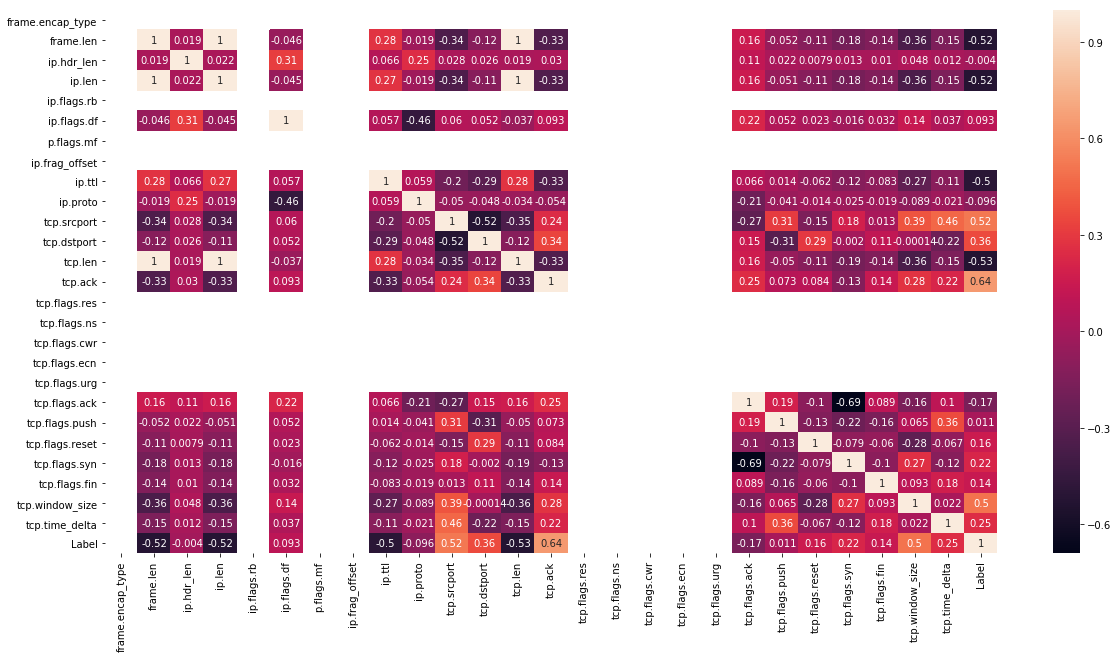

In [101]:
plt.figure(figsize=(20,10))
ax=sns.heatmap(df_merged.corr(),annot=True)